In [3]:
pip install opencv-python

     ---------------------------------------- 38.1/38.1 MB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np # l|inear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import sklearn
import random
import tensorflow as tf
import os
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# base_path and labels.
base_path = 'C:/Users/jentl/Downloads/ISIC2019_HALF'
labels = ['AK', 'BCC', 'BKL' ,'DF' ,'MEL' ,'NV' , 'SCC' , 'VASC']

In [16]:
# Constants
IMAGE_SIZE = 224
BATCH_SIZE = 64
VERBOSE = 1

In [17]:
# Dataset from the training folder.
x_train=[]
y_train=[]
for i in labels:
    folderPath = os.path.join(os.path.join(base_path,'train'),i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
        x_train.append(img)
        y_train.append(i)
print('Training dataset Loading complete.')
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train, y_train = sklearn.utils.shuffle(x_train, y_train, random_state=0)

print('Testing dataset Loading complete.')

100%|████████████████████████████████████████████████████████████████████████████████| 133/133 [00:01<00:00, 97.82it/s]


Training dataset Loading complete.
Testing dataset Loading complete.


In [21]:
# Dataset from the training folder.
x_test=[]
y_test=[]
for i in labels:
    folderPath = os.path.join(os.path.join(base_path,'test'),i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
        x_test.append(img)
        y_test.append(i)
print('Training dataset Loading complete.')
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test, y_test = sklearn.utils.shuffle(x_test, y_test, random_state=0)

print('Testing dataset Loading complete.')

100%|█████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 121.57it/s]


Training dataset Loading complete.
Testing dataset Loading complete.


In [22]:
x_val=[]
y_val=[]
for i in labels:
    folderPath = os.path.join(os.path.join(base_path,'val'),i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
        x_val.append(img)
        y_val.append(i)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_val, y_val = sklearn.utils.shuffle(x_val, y_val, random_state=0)

print('validation dataset Loading complete.')

100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 89.41it/s]


validation dataset Loading complete.


In [23]:
# j=0
# for i in labels:
#     j=0
#     while True :
#         if y_train[j]==i:
#             plt.figure(figsize = (5,5))
#             plt.imshow(x_train[j])
#             plt.title(y_train[j])
#             break
#         j+=1

In [24]:
# datagen = ImageDataGenerator(
#     featurewise_center=False,
#     samplewise_center=False,
#     featurewise_std_normalization=False,
#     samplewise_std_normalization=False,
#     zca_whitening=False,
#     rotation_range=30,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True, vertical_flip=False
# )

# datagen.fit(x_train)
x_train.shape

(2153, 224, 224, 3)

In [25]:
# # Splitting of dataset for Testing.
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=0)

# print("Shapes X : Train :",x_train.shape,  " Test :",x_test.shape)
# print("Shapes Y : Train :",y_train.shape,  " Test :",y_test.shape)

In [26]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [27]:
y_val_new = []
for i in y_val:
    y_val_new.append(labels.index(i))
y_val = y_val_new
y_val = tf.keras.utils.to_categorical(y_val)

In [28]:
import tensorflow as tf
tf.keras.applications.efficientnet.preprocess_input

<function keras.src.applications.efficientnet.preprocess_input(x, data_format=None)>

In [29]:
# Importing the model and initializing.
from tensorflow.keras.applications import EfficientNetB0
effnet = EfficientNetB0(weights = 'imagenet',include_top=False,input_shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

16705208/16705208 [==============================] - 4s 0us/step


In [30]:
# Adding Top Layers.
model1 = effnet.output
model1 = tf.keras.layers.GlobalAveragePooling2D()(model1)
model1 = tf.keras.layers.Dropout(0.5)(model1)
model1 = tf.keras.layers.Dense(8, activation = 'softmax')(model1)
model1 = tf.keras.models.Model(inputs = effnet.input, outputs = model1)

# Model summary.
# model1.summary()

In [31]:
# Compiling Model
# model1.compile(loss = 'categorical_crossentropy', optimizer ='sgdm', metrics=['accuracy'])
# # Callbacks.
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
# tensorboard = TensorBoard(log_dir = 'logs')
# checkpoint = ModelCheckpoint("effnet1.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
# reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.0001,mode='auto',verbose=VERBOSE)

In [32]:
# Compiling Model
model1.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])
# Callbacks.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet1.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.0001,mode='auto',verbose=VERBOSE)

In [33]:
# Fitting the model
history1 = model1.fit(x_train, y_train, validation_data=(x_val,y_val), epochs = 20, verbose =VERBOSE, batch_size=BATCH_SIZE, callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 1.2787 - accuracy: 0.5309 
Epoch 1: val_accuracy improved from -inf to 0.29160, saving model to effnet1.h5


C:\Users\jentl\AppData\Local\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


34/34 [==============================] - 590s 17s/step - loss: 1.2787 - accuracy: 0.5309 - val_loss: 2.3596 - val_accuracy: 0.2916 - lr: 0.0010
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 0.5561 - accuracy: 0.7989 
Epoch 2: val_accuracy improved from 0.29160 to 0.32595, saving model to effnet1.h5
34/34 [==============================] - 569s 17s/step - loss: 0.5561 - accuracy: 0.7989 - val_loss: 3.2474 - val_accuracy: 0.3260 - lr: 0.0010
Epoch 3/20
34/34 [==============================] - ETA: 0s - loss: 0.2834 - accuracy: 0.9029 
Epoch 3: val_accuracy improved from 0.32595 to 0.35038, saving model to effnet1.h5
34/34 [==============================] - 569s 17s/step - loss: 0.2834 - accuracy: 0.9029 - val_loss: 3.0857 - val_accuracy: 0.3504 - lr: 0.0010
Epoch 4/20
34/34 [==============================] - ETA: 0s - loss: 0.1908 - accuracy: 0.9345 
Epoch 4: val_accuracy did not improve from 0.35038
34/34 [==============================] - 566s 17s/step - loss: 0.1

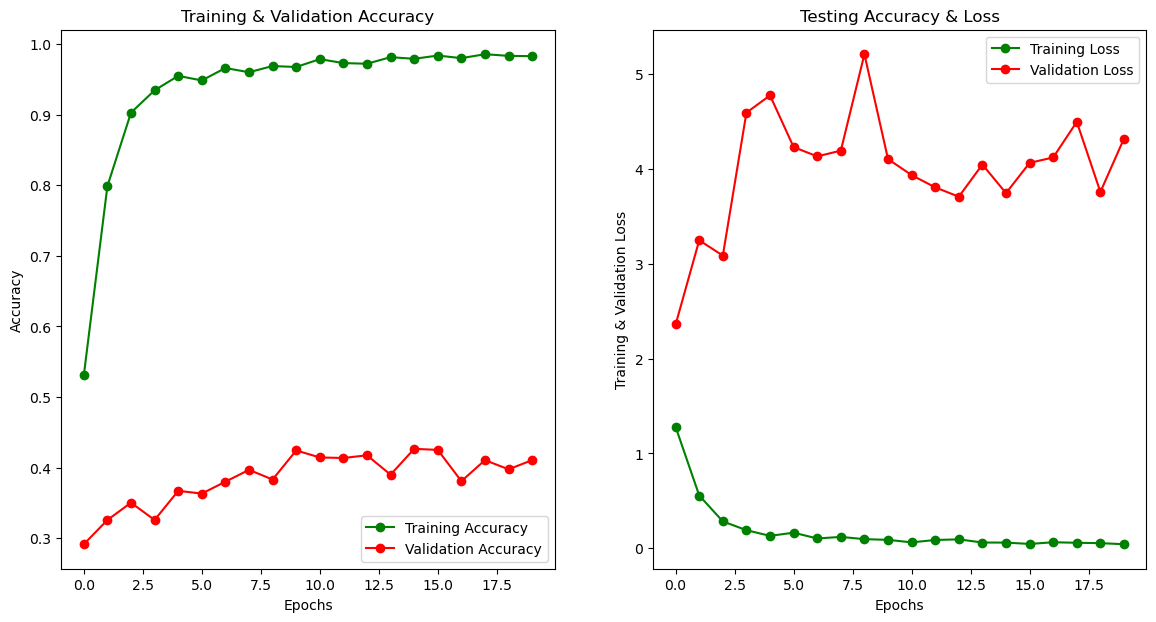

In [39]:
epochs = [i for i in range(20)]
fig, ax = plt.subplots(1,2)
train_acc = history1.history['accuracy']
train_loss = history1.history['loss']
val_acc = history1.history['val_accuracy']
val_loss = history1.history['val_loss']
fig.set_size_inches(14, 7)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss, 'g-o', label ='Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')
plt.show()

In [35]:
# Evaluating Model.
result1=model1.evaluate(x_test, y_test)
print("Testing Loss :", result1[0])
print("Testing Accuracy :", result1[1]*100, "%")

40/40 [==============================] - 72s 2s/step - loss: 4.1062 - accuracy: 0.4448
Testing Loss : 4.106164932250977
Testing Accuracy : 44.47999894618988 %


In [36]:
predictions1 = model1.predict(x_test)
predictions1 = np.argmax(predictions1, axis = 1)
y_test_edit = np.argmax(y_test , axis = 1)

40/40 [==============================] - 62s 2s/step


In [37]:
# Classification report.
from sklearn.metrics import classification_report
cf_report = sklearn.metrics.classification_report(y_test_edit, predictions1 )
print(cf_report)

              precision    recall  f1-score   support

           0       0.84      0.29      0.43       200
           1       0.35      0.95      0.51       160
           2       0.56      0.80      0.66       190
           3       0.74      0.34      0.47        50
           4       0.25      0.28      0.26       230
           5       0.36      0.10      0.16       200
           6       0.41      0.17      0.24       150
           7       0.93      0.93      0.93        70

    accuracy                           0.44      1250
   macro avg       0.56      0.48      0.46      1250
weighted avg       0.50      0.44      0.41      1250



<Axes: >

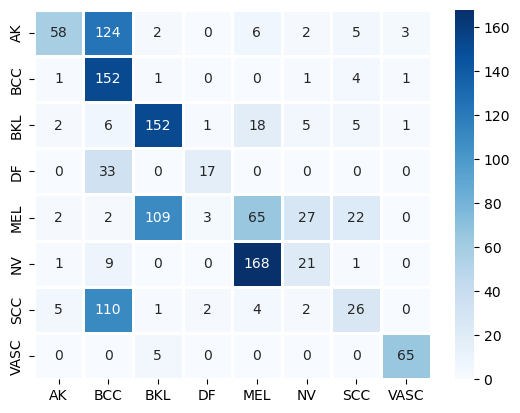

In [38]:
cf_matrix = sklearn.metrics.confusion_matrix(y_test_edit, predictions1)
sns.heatmap(cf_matrix, cmap = 'Blues', linewidth = 1, annot = True, xticklabels=labels, yticklabels=labels, fmt='d')